Read dimensions from shape file: depth=78, rows=512, cols=512
Read data size: 20447232
Read dimensions from shape file: depth=78, rows=512, cols=512
Read data size: 20447232


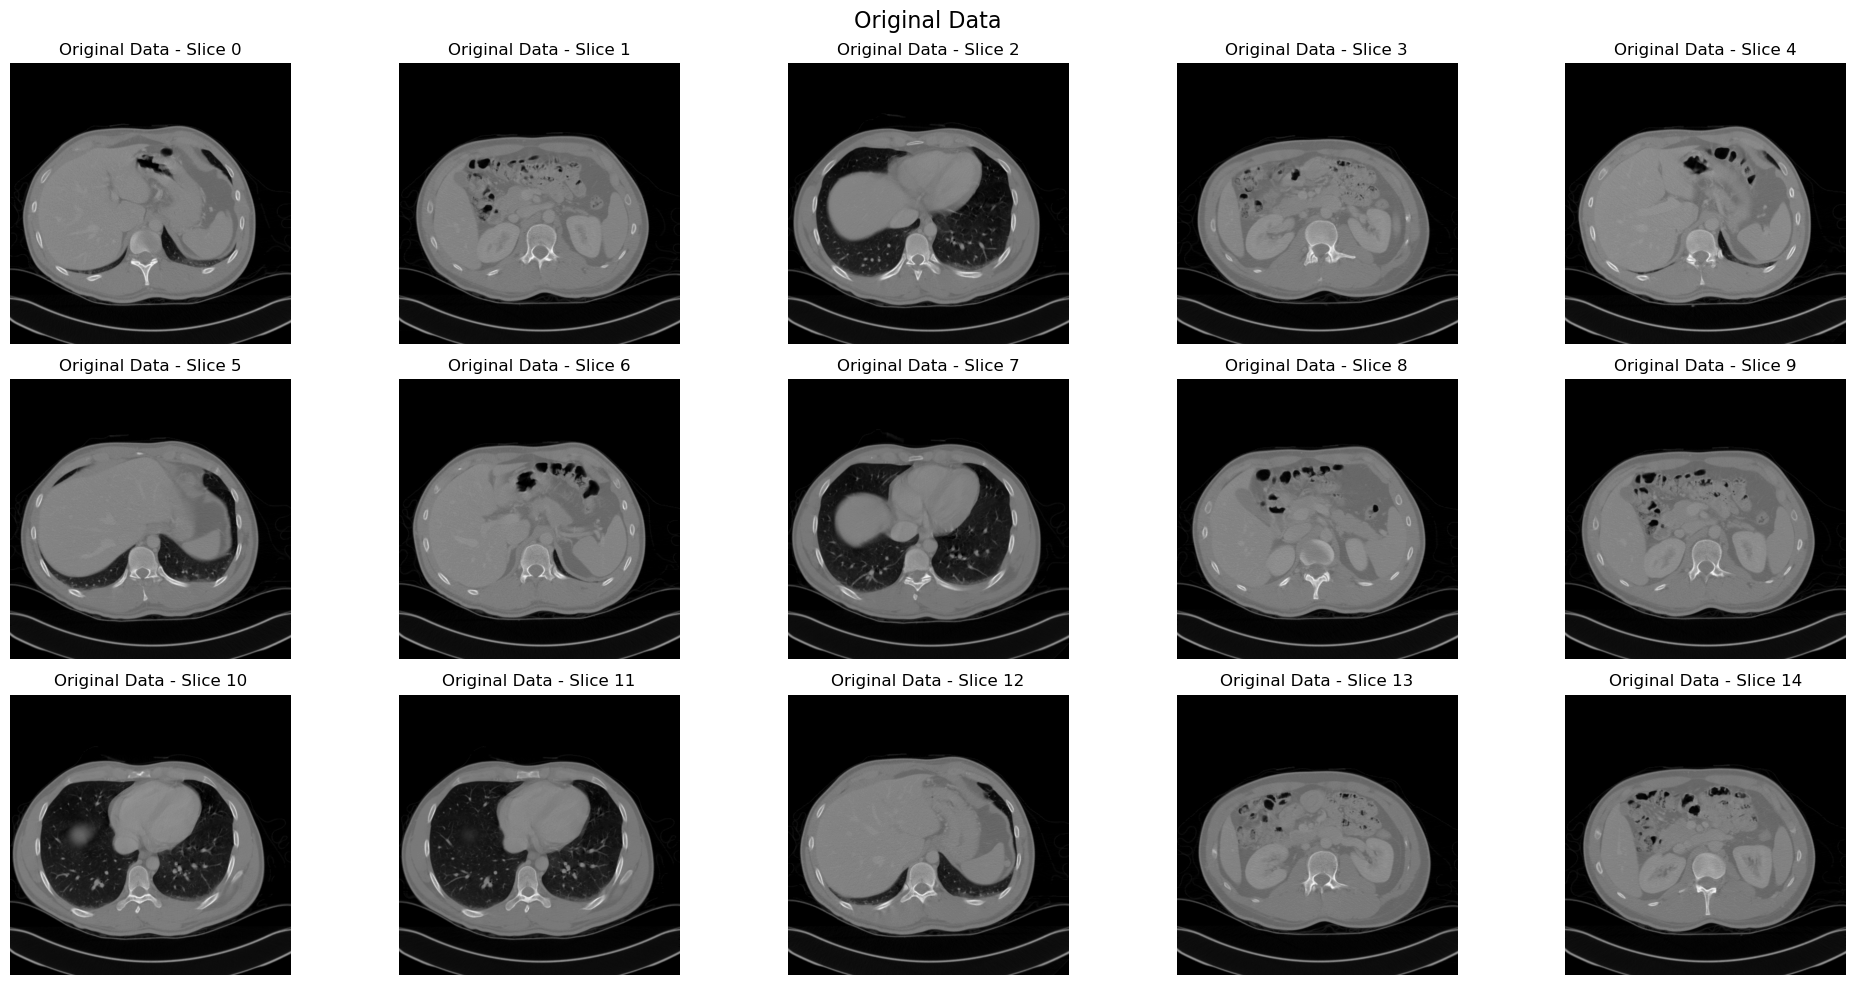

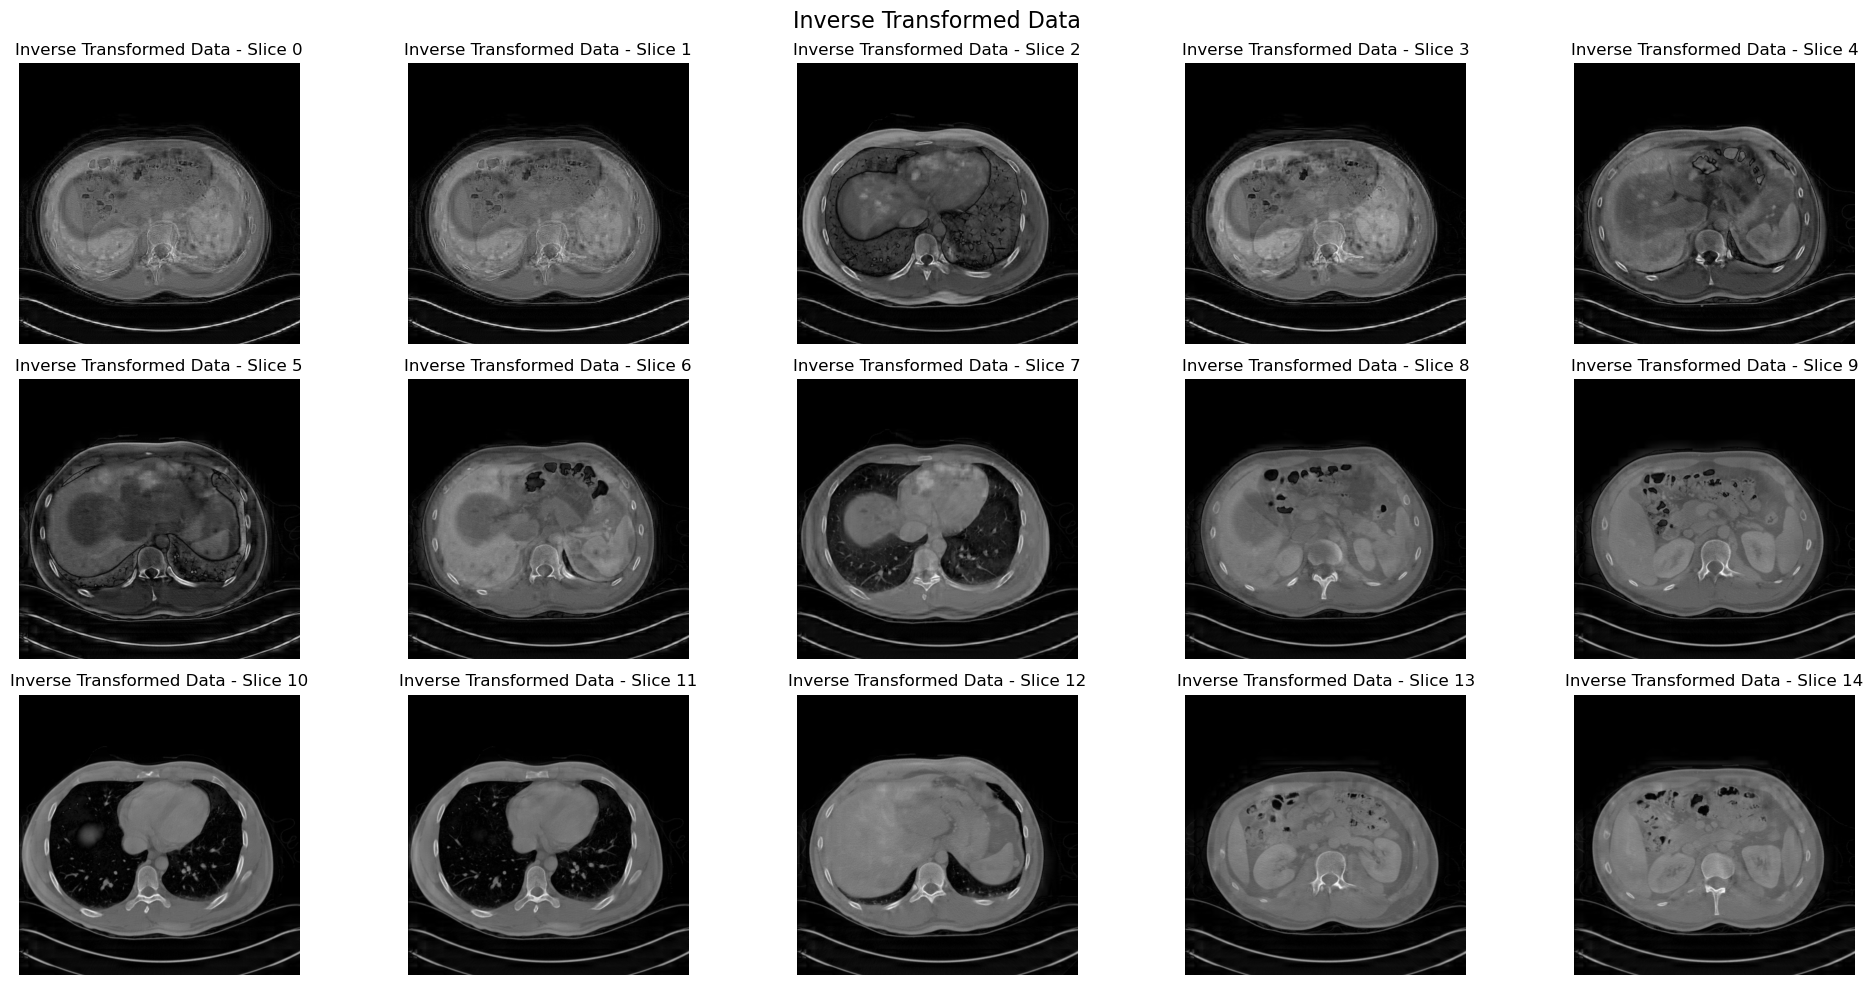

Mean Squared Error (MSE) between original and inverse data: 25752.513671875


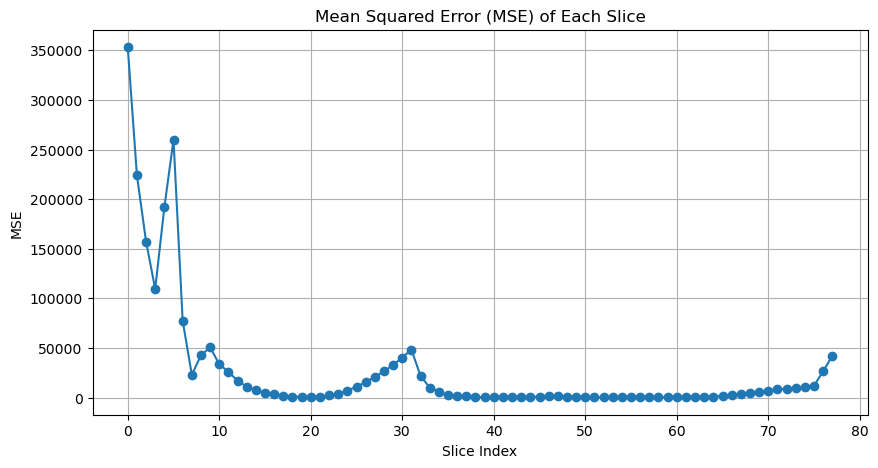

In [85]:
import numpy as np
import matplotlib.pyplot as plt

def read_shape_file(shape_filename):
    with open(shape_filename, 'r') as f:
        shape = tuple(map(int, f.read().strip().split(',')))
    return shape

def read_binary_file(filename, shape_filename):
    # Read the shape information
    depth, rows, cols = read_shape_file(shape_filename)
    print(f"Read dimensions from shape file: depth={depth}, rows={rows}, cols={cols}")
    
    # Read the binary file
    with open(filename, 'rb') as file:
        data = np.fromfile(file, dtype=np.float32)
        print(f"Read data size: {data.size}")
        
        data = data.reshape((depth, rows, cols))
        
    return data

def normalize(data):
    data = np.abs(data)
    if np.max(data) != 0:
        data = data / np.max(data)
    return data

def display_slices(data, title, num_slices=15):
    fig, axes = plt.subplots(3, 5, figsize=(20, 10))
    fig.suptitle(title, fontsize=16)

    for i in range(num_slices):
        ax = axes[i // 5, i % 5]
        ax.imshow(normalize(data[i]), cmap='gray')
        ax.set_title(f'{title} - Slice {i}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

def plot_slice_mses(original_data, inverse_data):
    num_slices = original_data.shape[0]
    mses = [np.mean((original_data[i] - inverse_data[i]) ** 2) for i in range(num_slices)]
    
    plt.figure(figsize=(10, 5))
    plt.plot(mses, marker='o')
    plt.title('Mean Squared Error (MSE) of Each Slice')
    plt.xlabel('Slice Index')
    plt.ylabel('MSE')
    plt.grid(True)
    plt.show()

# Read the original input data
original_filename = '../data/inputs/3_CT.bin'
shape_filename = '../data/inputs/3_CT_shape.txt'
original_data = read_binary_file(original_filename, shape_filename)

# Read the inverse transformed data from the C++ implementation
inverse_cpp_filename = '../data/outputs/inverse_3_CT_db2_5.bin'
inverse_data = read_binary_file(inverse_cpp_filename, shape_filename)

# Display the first 15 slices of the original data
display_slices(original_data, 'Original Data', num_slices=15)

# Display the first 15 slices of the inverse transformed data
display_slices(inverse_data, 'Inverse Transformed Data', num_slices=15)

# Calculate and print the Mean Squared Error (MSE) between the original and inverse data
mse = np.mean((original_data - inverse_data) ** 2)
print(f"Mean Squared Error (MSE) between original and inverse data: {mse}")

# Plot the individual MSEs of each slice
plot_slice_mses(original_data, inverse_data)